In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep_Learning/ANN_Practice/Telco_churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.drop('customerID',axis=1,inplace= True)

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
df.describe(include = 'all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [10]:
#finding the unique values in each column
for i in df.columns:
    print(str(i)+ ':  '+ str(df[i].unique()))

gender:  ['Female' 'Male']
SeniorCitizen:  [0 1]
Partner:  ['Yes' 'No']
Dependents:  ['No' 'Yes']
tenure:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:  ['No' 'Yes']
MultipleLines:  ['No phone service' 'No' 'Yes']
InternetService:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity:  ['No' 'Yes' 'No internet service']
OnlineBackup:  ['Yes' 'No' 'No internet service']
DeviceProtection:  ['No' 'Yes' 'No internet service']
TechSupport:  ['No' 'Yes' 'No internet service']
StreamingTV:  ['No' 'Yes' 'No internet service']
StreamingMovies:  ['No' 'Yes' 'No internet service']
Contract:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:  [29.85 56.95 53.85 ... 63.1  44.2

In [11]:
#replacing NO internet service as No
df.replace('No internet service','No',inplace = True)

In [12]:
#finding the unique values in each column
for i in df.columns:
    print(str(i)+ ':  '+ str(df[i].unique()))

gender:  ['Female' 'Male']
SeniorCitizen:  [0 1]
Partner:  ['Yes' 'No']
Dependents:  ['No' 'Yes']
tenure:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:  ['No' 'Yes']
MultipleLines:  ['No phone service' 'No' 'Yes']
InternetService:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity:  ['No' 'Yes']
OnlineBackup:  ['Yes' 'No']
DeviceProtection:  ['No' 'Yes']
TechSupport:  ['No' 'Yes']
StreamingTV:  ['No' 'Yes']
StreamingMovies:  ['No' 'Yes']
Contract:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:  ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:  ['No' 'Yes']


In [13]:
#replacing No phone service as No
df.replace('No phone service','No',inplace = True)

In [14]:
#finding the unique values in each column
for i in df.columns:
    print(str(i)+ ':  '+ str(df[i].unique()))

gender:  ['Female' 'Male']
SeniorCitizen:  [0 1]
Partner:  ['Yes' 'No']
Dependents:  ['No' 'Yes']
tenure:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:  ['No' 'Yes']
MultipleLines:  ['No' 'Yes']
InternetService:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity:  ['No' 'Yes']
OnlineBackup:  ['Yes' 'No']
DeviceProtection:  ['No' 'Yes']
TechSupport:  ['No' 'Yes']
StreamingTV:  ['No' 'Yes']
StreamingMovies:  ['No' 'Yes']
Contract:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:  ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:  ['No' 'Yes']


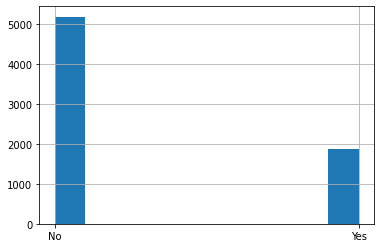

In [15]:
df['Churn'].hist()

In [16]:
len(df[df['Churn']=='Yes'])

1869

In [17]:
len(df[df['Churn']=='No'])

5174

In [18]:
1869/(1869+5174)

0.2653698707936959

In [19]:
#check for the missing values in the dataset
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
df['TotalCharges'].astype('float')

ValueError: ignored

In [21]:
#from the above error we can see that there are values with blank
len(df[df['TotalCharges']==' '])

11

In [22]:
df[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [23]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [24]:
#removin the blank rows in Total Charges
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [25]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
df1['TotalCharges'].dtype

dtype('float64')

In [27]:
#findin the categorical and numerical columns in the dataset
cat_col = []
num_col = []
for i in df1.columns:
    if df1[i].dtypes == 'O':
        cat_col.append(i)
    else:
        num_col.append(i)

In [28]:
cat_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [29]:
num_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Correlation Matrix

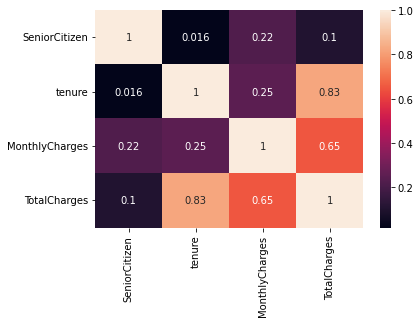

In [30]:
sns.heatmap(df1.corr(),annot = True)

1. As the tenure increases Monthly charges are also increasing
2. As the tenure increases Total charges are also increasing(highly correlated) 
3. As Monthly Charges increase Total charges are also increasing

# Chi-square Test

In [31]:
# import necessary libraries for chi-square test
from scipy.stats import stats,chi2_contingency
# creating function for performing chi-sqaure test on two columns
def chisq(i1,i2):
    print(str(i1) + " " + str(i2))
    dataset_table = pd.crosstab(df1[i1],df1[i2])
    #Contingency Table  
    stat, p, dof, expected = chi2_contingency(dataset_table)
    #Observed Values
    print(dataset_table.values)
    #Expected Values
    print(expected)   
    #Degree of Freedom
    print(dof)  
    
    #Significance Level 5%
    alpha = 0.05
    #chi-square statistic
    from scipy.stats import chi2
    chi_square=sum([(o-e)**2./e for o,e in zip(dataset_table.values,expected)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    print("chi-square statistic:-",chi_square_statistic)
    #critical_value
    critical_value=chi2.ppf(q=1-alpha,df=dof)
    print('critical_value:',critical_value)
    
    #p-value
    p_value=1-chi2.cdf(x=chi_square_statistic,df=dof)
    print('p-value:',p_value)
    print('Significance level: ',alpha)
    print('Degree of Freedom: ',dof)
    print('p-value:',p_value)

    # conditional statements for checking chi-sqaure test condition for hypothesis selection based on chi_square_statistic and critical_value     
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    # conditional statements for checking chi-sqaure test condition for hypothesis selection based on p_value and alpha
    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    
    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")

In [32]:
for i in range(len(cat_col)):
    for j in range(i+1):
        if i==j:
            continue
        else:
            chisq(cat_col[i],cat_col[j])

Partner gender
[[1800 1839]
 [1683 1710]]
[[1802.42278157 1836.57721843]
 [1680.57721843 1712.42278157]]
1
chi-square statistic:- 0.013373334879339354
critical_value: 3.841458820694124
p-value: 0.9079353747286687
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.9079353747286687
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Dependents gender
[[2460 2473]
 [1023 1076]]
[[2443.35025597 2489.64974403]
 [1039.64974403 1059.35025597]]
1
chi-square statistic:- 0.7531278027424451
critical_value: 3.841458820694124
p-value: 0.38548775316399964
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.38548775316399964
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Dependents Partner
[[

# Data Visualization

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


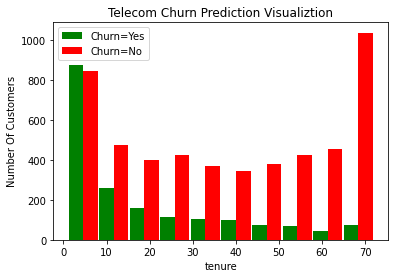

In [33]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Telecom Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


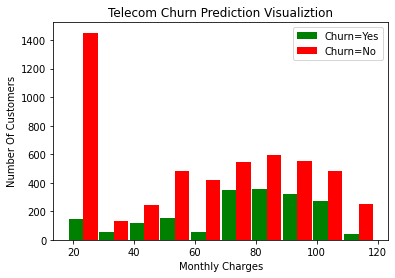

In [34]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Telecom Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

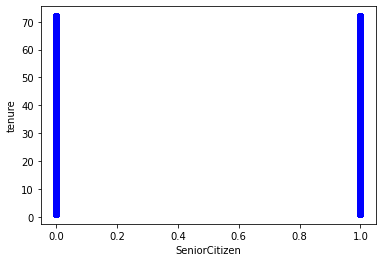

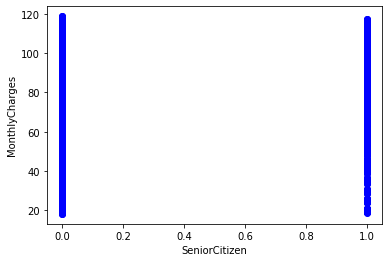

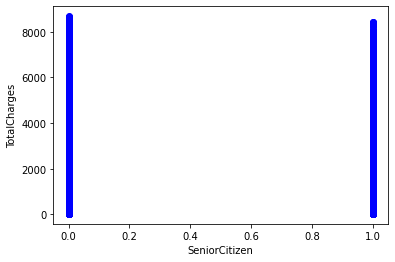

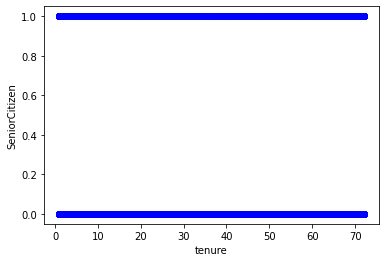

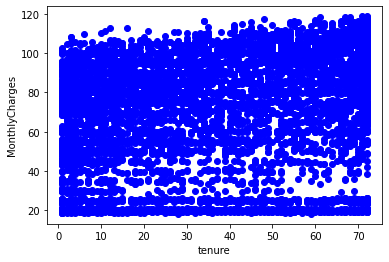

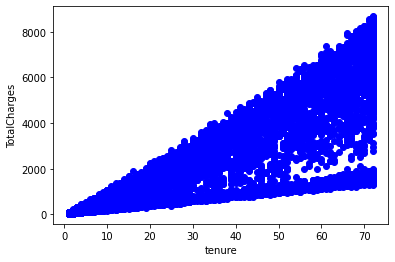

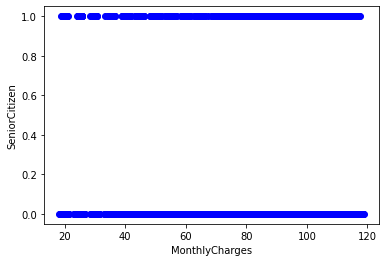

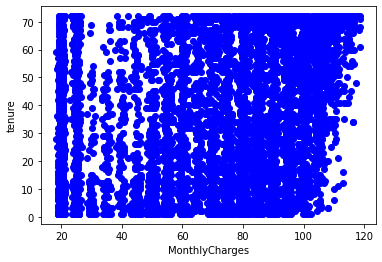

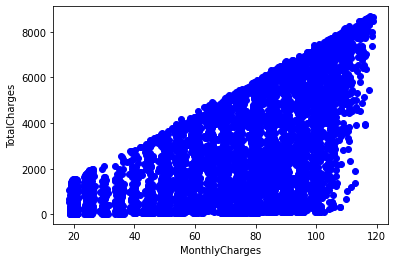

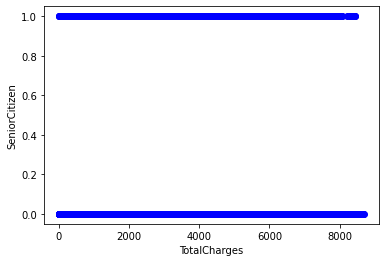

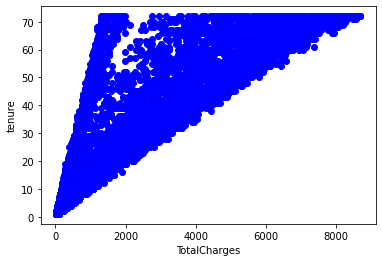

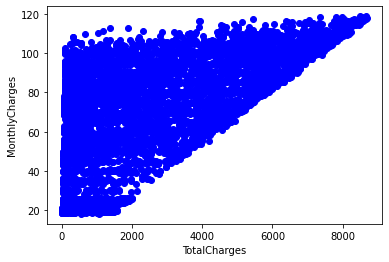

In [35]:
# Scatter plot using matplotlib 
import itertools
import matplotlib.pyplot as plt
# create function for ploting scatterplot between two columns of dataset
def scatter(i,j):
    plt.scatter(df1[i],df1[j],c ="blue")
    plt.xlabel(i)
    plt.ylabel(j)
    plt.show()

# Loop through numerical data list and use function to scatter plot between two columns
l1 = list(itertools.permutations(num_col, 2))

for i in l1:
    scatter(i[0],i[1])

# results
1. As the tenure increases Monthly chares are also increasing
2. As the tenure increases Total chares are also increasing
3. As Monthly Charges increase Total charges are also increasin

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3362bc510>,
      dtype=object)

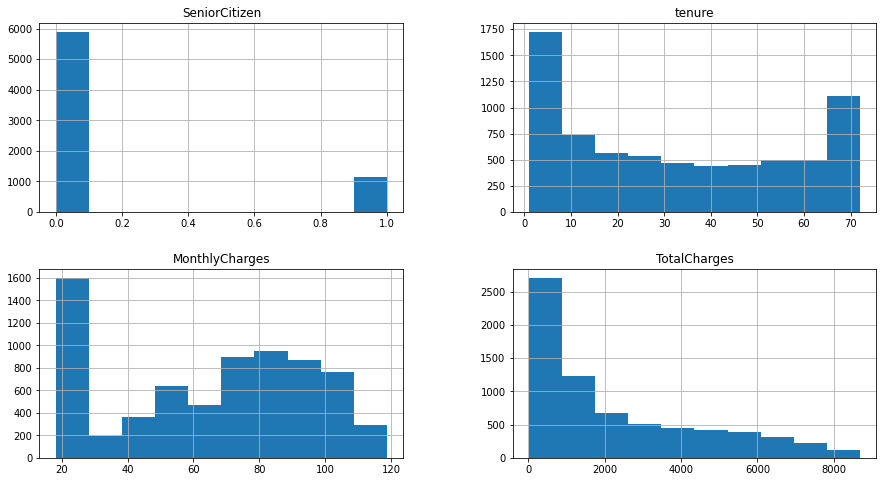

In [36]:
# Histogram using pandas 
df1[num_col].hist(figsize =(15,8))

# groupby

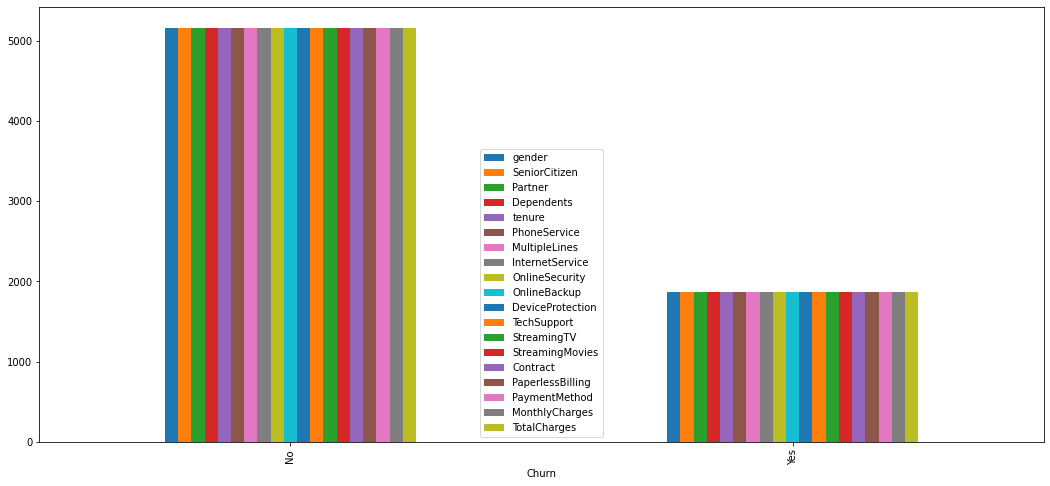

In [37]:
# goup data by jobType and plot count plot
df1.groupby('Churn').count().plot(kind='bar',figsize = (18,8))

## Box Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


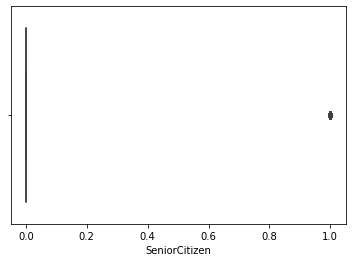

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


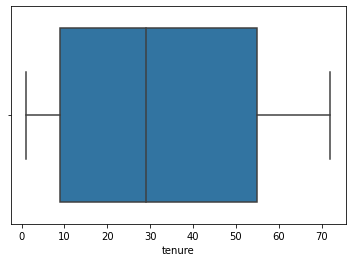

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


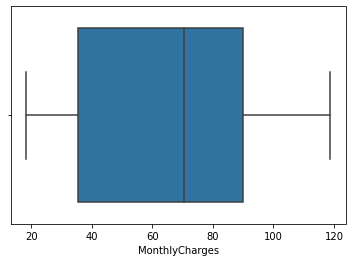

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


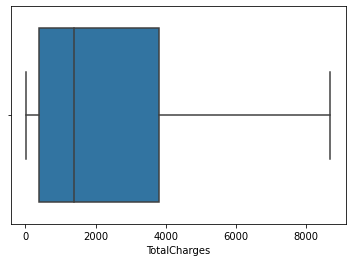

In [38]:
for i in num_col:
    sns.boxplot(df1[i])
    plt.show()

# Converting categorical features to numerical features

In [39]:
cat_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [40]:
for i in cat_col:
    print(str(i) + ": "+str(df1[i].unique()))

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [41]:
#Replacing the Yes and No with 0 and 1
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [42]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [43]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


# One hot encoding for categorical columns

In [44]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [45]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [46]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

# scaling the data

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X),columns = X.columns)

In [48]:
X_scaled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,-0.854336,-0.633746,1.378330,-0.723918,...,1.382243,-0.886896,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604
1,-0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.854336,1.577918,-0.725516,1.381372,...,1.382243,-0.886896,-0.52513,-1.107895,1.943495,-0.561364,-0.529976,-0.525351,-0.711863,1.839576
2,-0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.854336,1.577918,1.378330,-0.723918,...,1.382243,-0.886896,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,-0.711863,1.839576
3,-0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,-0.854336,1.577918,-0.725516,1.381372,...,1.382243,-0.886896,-0.52513,-1.107895,1.943495,-0.561364,1.886879,-0.525351,-0.711863,-0.543604
4,1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.854336,-0.633746,-0.725516,-0.723918,...,-0.723462,1.127527,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.990658,-0.440327,1.035617,1.533025,-0.343137,0.327189,1.170500,1.577918,-0.725516,1.381372,...,1.382243,-0.886896,-0.52513,-1.107895,1.943495,-0.561364,-0.529976,-0.525351,-0.711863,1.839576
7028,1.009430,-0.440327,1.035617,1.533025,1.612573,0.327189,1.170500,-0.633746,1.378330,1.381372,...,-0.723462,1.127527,-0.52513,-1.107895,1.943495,-0.561364,-0.529976,1.903490,-0.711863,-0.543604
7029,1.009430,-0.440327,1.035617,1.533025,-0.872808,-3.056334,-0.854336,1.577918,-0.725516,-0.723918,...,1.382243,-0.886896,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,1.404764,-0.543604
7030,-0.990658,2.271039,1.035617,-0.652305,-1.158016,0.327189,1.170500,-0.633746,-0.725516,-0.723918,...,-0.723462,1.127527,-0.52513,0.902613,-0.514537,-0.561364,-0.529976,-0.525351,-0.711863,1.839576


# Splitting the data into train_test split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3,shuffle = True,random_state=5)

In [51]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [52]:
x_train.shape

(4922, 26)

In [53]:
x_test.shape

(2110, 26)

In [54]:
y_train.shape

(4922,)

# Handling Imbalanced Dataset

In [55]:
from imblearn.over_sampling import RandomOverSampler

In [56]:
from collections import Counter
os=RandomOverSampler()
X_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 3652, 1: 1270})
The number of classes after fit Counter({1: 3652, 0: 3652})


In [57]:
# Applying SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(sampling_strategy='minority')
X_train_sm,y_train_sm = smote.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_sm)))

The number of classes before fit Counter({0: 3652, 1: 1270})
The number of classes after fit Counter({1: 3652, 0: 3652})


# Build simple ANN with weights initialization  

In [58]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,class_weight = {0:1,1:3},epochs=100)

Epoch 1/100
154/154 [==============================] - 6s 6ms/step - loss: 0.9401 - accuracy: 0.6696
Epoch 2/100
154/154 [==============================] - 1s 7ms/step - loss: 0.8357 - accuracy: 0.7192
Epoch 3/100
154/154 [==============================] - 1s 7ms/step - loss: 0.8132 - accuracy: 0.7186
Epoch 4/100
154/154 [==============================] - 1s 6ms/step - loss: 0.7851 - accuracy: 0.7347
Epoch 5/100
154/154 [==============================] - 1s 6ms/step - loss: 0.7919 - accuracy: 0.7310
Epoch 6/100
154/154 [==============================] - 1s 6ms/step - loss: 0.7758 - accuracy: 0.7292
Epoch 7/100
154/154 [==============================] - 1s 4ms/step - loss: 0.7743 - accuracy: 0.7302
Epoch 8/100
154/154 [==============================] - 1s 4ms/step - loss: 0.7603 - accuracy: 0.7444
Epoch 9/100
154/154 [==============================] - 1s 4ms/step - loss: 0.7654 - accuracy: 0.7379
Epoch 10/100
154/154 [==============================] - 1s 4ms/step - loss: 0.7643 - accura

In [59]:
model.evaluate(x_test, y_test)

66/66 [==============================] - 0s 3ms/step - loss: 0.5150 - accuracy: 0.7256


[0.5149592757225037, 0.7255924344062805]

In [60]:
yp = model.predict(x_test)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [61]:
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1511
           1       0.51      0.81      0.63       599

    accuracy                           0.73      2110
   macro avg       0.71      0.75      0.70      2110
weighted avg       0.79      0.73      0.74      2110

[[1045  466]
 [ 113  486]]
0.7255924170616114


In [64]:
import kerastuner
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU

from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [63]:
!pip install keras-tuner

     |████████████████████████████████| 98 kB 3.3 MB/s 


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [65]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=1024,
                                            step=2),
                               activation='relu'))
        model.add(keras.layers.Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.5,
                default=0.25,
                step=0.05,
            )))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-1,1e-2, 1e-3, 1e-4, 0.2 , 0.3, 0.4, 0.5 ])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [68]:
from tensorflow import keras
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir10') #change the directory name here  when rerunning the cell else it gives "Oracle exit error" 

tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 2, 'sampling': None}
dropout_1 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 2, 'sampling': None}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001, 0.2, 0.3, 0.4, 0.5], 'ordered': True}


In [69]:
tuner.search(x_train,y_train,
             epochs=100,
             validation_data=(x_test,y_test))

Trial 5 Complete [00h 04m 24s]
val_accuracy: 0.7161137461662292

Best val_accuracy So Far: 0.7872037887573242
Total elapsed time: 00h 14m 16s
INFO:tensorflow:Oracle triggered exit


###  Build a model (ANN) in tensorflow/keras

In [70]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_sm,y_train_sm, epochs=100)

Epoch 1/100
229/229 [==============================] - 2s 4ms/step - loss: 0.6298 - accuracy: 0.6423
Epoch 2/100
229/229 [==============================] - 1s 4ms/step - loss: 0.5358 - accuracy: 0.7471
Epoch 3/100
229/229 [==============================] - 1s 4ms/step - loss: 0.5066 - accuracy: 0.7575
Epoch 4/100
229/229 [==============================] - 1s 4ms/step - loss: 0.4991 - accuracy: 0.7629
Epoch 5/100
229/229 [==============================] - 1s 4ms/step - loss: 0.4969 - accuracy: 0.7662
Epoch 6/100
229/229 [==============================] - 1s 4ms/step - loss: 0.4920 - accuracy: 0.7734
Epoch 7/100
229/229 [==============================] - 1s 4ms/step - loss: 0.4875 - accuracy: 0.7709
Epoch 8/100
229/229 [==============================] - 1s 4ms/step - loss: 0.4824 - accuracy: 0.7741
Epoch 9/100
229/229 [==============================] - 1s 4ms/step - loss: 0.4837 - accuracy: 0.7751
Epoch 10/100
229/229 [==============================] - 1s 4ms/step - loss: 0.4758 - accura

In [71]:
model.evaluate(x_test, y_test)

66/66 [==============================] - 0s 3ms/step - loss: 0.5075 - accuracy: 0.7488


[0.5074530243873596, 0.7488151788711548]

In [72]:
yp = model.predict(x_test)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [73]:
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1511
           1       0.55      0.67      0.60       599

    accuracy                           0.75      2110
   macro avg       0.70      0.72      0.71      2110
weighted avg       0.77      0.75      0.76      2110

[[1180  331]
 [ 199  400]]
0.7488151658767772


Text(69.0, 0.5, 'Truth')

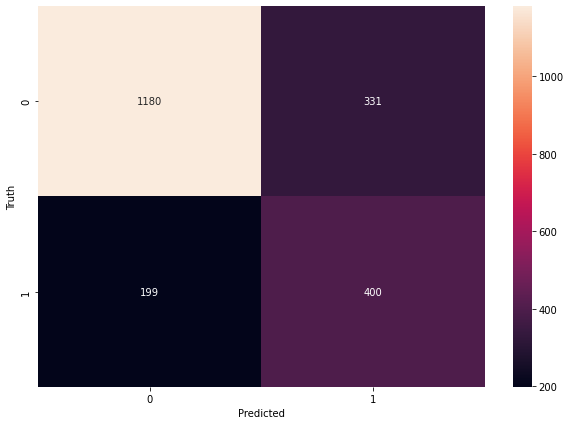

In [74]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# hyper parameter tuning 

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

from sklearn.preprocessing import StandardScaler

In [76]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [77]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=x_train.shape[1]))
            model.add(Activation(activation))
            
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
    model.add(Dense(1)) # Note: no activation beyond this point
    model.add(Activation(activation))
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [78]:
model

In [79]:
layers = [[20], [40, 20], [45, 30, 15],[60,40,20]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[10])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [80]:
grid_result = grid.fit(X_train_sm,y_train_sm)

In [81]:
[grid_result.best_score_,grid_result.best_params_]

[0.7428807497024537,
 {'activation': 'sigmoid',
  'batch_size': 128,
  'epochs': 10,
  'layers': [45, 30, 15]}]

# Hyper parameter tuning using Keras-tuner

In [82]:
import kerastuner
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 98 kB 4.1 MB/s 


In [83]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

In [84]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=1024,
                                            step=2),
                               activation='relu'))
        model.add(layers.Dropout(rate=hp.Float(
                'dropout_1',
                min_value=0.0,
                max_value=0.5,
                default=0.25,
                step=0.05,
            )))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-1,1e-2, 1e-3, 1e-4, 0.2 , 0.3, 0.4, 0.5 ])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [86]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir5') #change the directory name here  when rerunning the cell else it gives "Oracle exit error" 

tuner.search_space_summary()

Search space summary
Default search space size: 5
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 2, 'sampling': None}
dropout_1 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 2, 'sampling': None}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001, 0.2, 0.3, 0.4, 0.5], 'ordered': True}


In [87]:
tuner.search(X_train_sm,y_train_sm,
             epochs=100,
             validation_data=(x_test,y_test))

Trial 5 Complete [00h 04m 23s]
val_accuracy: 0.7161137461662292

Best val_accuracy So Far: 0.772037923336029
Total elapsed time: 00h 20m 04s
INFO:tensorflow:Oracle triggered exit


In [89]:
tuner.results_summary()

Results summary
Results in my_dir5/untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 7
units_0: 42
dropout_1: 0.4
units_1: 448
learning_rate: 0.01
units_2: 358
units_3: 328
units_4: 760
units_5: 98
units_6: 32
Score: 0.772037923336029
Trial summary
Hyperparameters:
num_layers: 6
units_0: 420
dropout_1: 0.4
units_1: 708
learning_rate: 0.4
units_2: 32
units_3: 32
units_4: 32
units_5: 32
Score: 0.7161137461662292
Trial summary
Hyperparameters:
num_layers: 16
units_0: 720
dropout_1: 0.15000000000000002
units_1: 936
learning_rate: 0.5
units_2: 72
units_3: 154
units_4: 880
units_5: 522
units_6: 492
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
Score: 0.7161137461662292
Trial summary
Hyperparameters:
num_layers: 13
units_0: 730
dropout_1: 0.15000000000000002
units_1: 496
learning_rate: 0.4
units_2: 740
units_3: 960
units_4: 350
units_5: 268
units

In [90]:
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print(best_hyperparameters.values)

# probing function tuner.get_best_hyperparameters(1) #skip this if details are not required
print(type(tuner.get_best_hyperparameters(1))) #list
for data in tuner.get_best_hyperparameters(1):
  print(data.values)

{'num_layers': 7, 'units_0': 42, 'dropout_1': 0.4, 'units_1': 448, 'learning_rate': 0.01, 'units_2': 358, 'units_3': 328, 'units_4': 760, 'units_5': 98, 'units_6': 32}
<class 'list'>
{'num_layers': 7, 'units_0': 42, 'dropout_1': 0.4, 'units_1': 448, 'learning_rate': 0.01, 'units_2': 358, 'units_3': 328, 'units_4': 760, 'units_5': 98, 'units_6': 32}


In [91]:
model = tuner.hypermodel.build(best_hyperparameters)
history = model.fit(X_train_sm,y_train_sm,
             epochs=25,
             validation_data=(x_test,y_test))

Epoch 1/25
229/229 [==============================] - 3s 7ms/step - loss: 0.6575 - accuracy: 0.6757 - val_loss: 0.6586 - val_accuracy: 0.5289
Epoch 2/25
229/229 [==============================] - 2s 7ms/step - loss: 0.6599 - accuracy: 0.6633 - val_loss: 0.5823 - val_accuracy: 0.5886
Epoch 3/25
229/229 [==============================] - 2s 7ms/step - loss: 0.7184 - accuracy: 0.5820 - val_loss: 0.6904 - val_accuracy: 0.7161
Epoch 4/25
229/229 [==============================] - 2s 7ms/step - loss: 0.7157 - accuracy: 0.4951 - val_loss: 0.6898 - val_accuracy: 0.7161
Epoch 5/25
229/229 [==============================] - 1s 6ms/step - loss: 0.7013 - accuracy: 0.5010 - val_loss: 0.7045 - val_accuracy: 0.2839
Epoch 6/25
229/229 [==============================] - 2s 7ms/step - loss: 0.7202 - accuracy: 0.4955 - val_loss: 0.6976 - val_accuracy: 0.2839
Epoch 7/25
229/229 [==============================] - 1s 7ms/step - loss: 0.6935 - accuracy: 0.5077 - val_loss: 0.6893 - val_accuracy: 0.7161
Epoch 

In [92]:
# evaluate model
_, acc = model.evaluate(x_test,y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 28.389


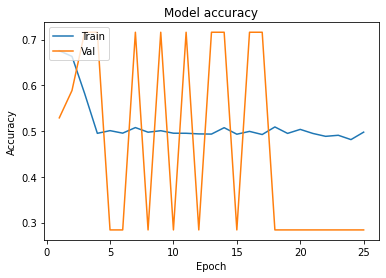

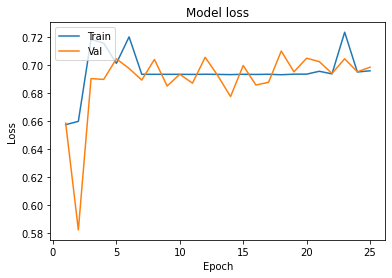

In [93]:
# Plot training & validation accuracy values
epoch_range = range(1, 26) #6 here is the number of epochs of final training
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()